# spaCy 
is a relatively new framework in the Python Natural Language Processing environment but it quickly gains ground and will most likely become the de facto library.

- spaCy is not research software. It’s built on the latest research, but it’s designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and research. The main difference is that spaCy is integrated and opinionated. _spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality._ 

Keeping the menu small lets spaCy deliver generally better performance and developer experience.

spaCy is __not a company.__ It’s an open-source library. [Explosion AI] https://spacy.io/usage/spacy-101

There are some really good reasons for its popularity:

- It's really FAST - Written in Cython, it was specifically designed to be as fast as possible

- It's really ACCURATE - spaCy implementation of its dependency parser is one of the best-performing in the world:

- Features included

    - Index preserving tokenization (details about this later)
    - Models for Part Of Speech tagging, Named Entity Recognition and Dependency Parsing
    - Supports 8 languages out of the box
    - Easy and beautiful visualizations
    - Pretrained word vectors
    
- Extensible
It plays nicely with all the other already existing tools that we know: Scikit-Learn, TensorFlow, gensim

- DeepLearning Ready
It also has its own deep learning framework that’s especially designed for NLP tasks:

    __Tokenization:__	Segmenting text into words, punctuations marks etc.
    
    __Part-of-speech(POS) Tagging:__	Assigning word types to tokens, like verb or noun.
    
    __Dependency Parsing:__  Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.
    
    __Lemmatization:__	Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.
    
    __Sentence Boundary Detection (SBD):__	Finding and segmenting individual sentences.
    
    __Named Entity Recognition (NER):__	Labelling named “real-world” objects, like persons, companies or locations.
    
    __Entity Linking (EL):__	Disambiguating textual entities to unique identifiers in a Knowledge Base.
    
    __Similarity__ Comparing words, text spans and documents and how similar they are to each other.
    
    __Text Classification:__	Assigning categories or labels to a whole document, or parts of a document.
    
    __Rule-based Matching:__	Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.
    
    __Training:__	Updating and improving a statistical model’s predictions.
    
    __Serialization:__	Saving objects to files or byte strings.
    
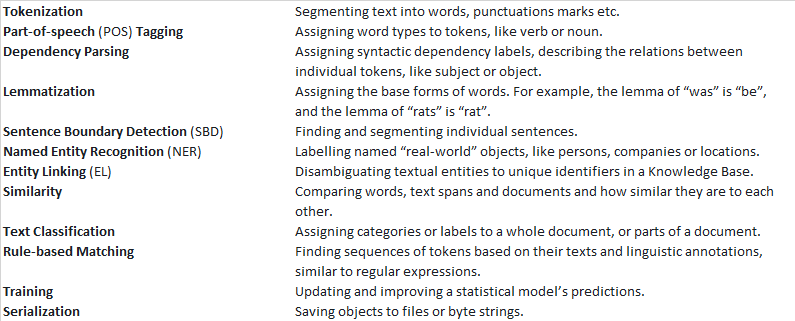

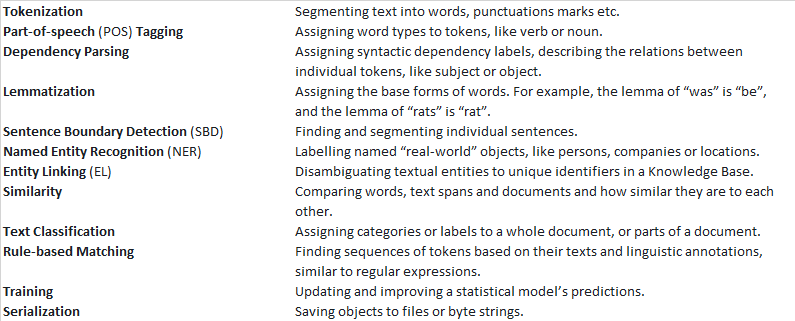


In [1]:
#pip install -U spaCy

# installing a model
# python -m spacy download en
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

In [50]:
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-2.2.0/en_core_web_lg-2.2.0.tar.gz

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\http\client.py", line 457, in read
    n = self.readinto(b)
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\http\client.py", line 501, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\ssl.py", line 1071, in recv_into
    return self.read(

In [28]:
import spacy

Once you’ve downloaded and installed a model, we can load it via __spacy.load()__

This will return a Language object containing all components and data needed to process text. We usually call it __nlp__

Example:-

    nlp = spacy.load("en") # shortcut link
    nlp = spacy.load("en_core_web_sm") # package
    nlp = spacy.load("/path/to/en") # unicode path
    nlp = spacy.load(Path("/path/to/en")) # pathlib Path

    nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger"])

In [29]:
# we import the core spaCy English model
nlp = spacy.load("en_core_web_sm")

## How to Read a String

In [31]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


## loading a text file

In [32]:
myfile = open(r'C:\Users\Sky\Desktop\SimpliLearn\NLP_Trainer_PPT_July\NLP_Trainer_PPT_July\Projects\0.1 Assisted Practices\Lesson 4\Assisted Practice 1\spacy-ex1.txt').read()

In [33]:
doc_file = nlp(myfile)

In [34]:
doc_file

The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful natural language processing systems developed in the 1960s 

## Tokenization

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

### sentence tokenization

In [35]:
about_text = ('Amit is a Python developer, currently'
...               ' working for a Delhi based popcorn-ai'
...               ' company. He is interested in learning'
...               ' Natural Language Processing.')

In [36]:
about_doc = nlp(about_text)
sentences = list(about_doc.sents)
len(sentences)

2

In [12]:
for sentence in sentences:
...     print (sentence)

Amit is a Python developer, currently working for a Delhi based popcorn-ai company.
He is interested in learning Natural Language Processing.


In the above example, spaCy is correctly able to identify sentences in the English language, using a full stop(.) as the sentence delimiter. You can also customize the sentence detection to detect sentences on custom delimiters.

#### custom sentence delimiter

In [13]:
def set_custom_boundaries(doc):
    
    # Adds support to use `...` as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '...':
            doc[token.i+1].is_sent_start = True

    return doc

In [14]:
ellipsis_text = ('Bangalore is coool ... weather is great'
                 ' But traffic is WORST ... a great place to live ... what you think'
                 ' let me know , Anyway let us connect tomm')

In [15]:
# Load a new model instance
custom_nlp = spacy.load('en_core_web_sm')

custom_nlp.add_pipe(set_custom_boundaries, before='parser')

custom_ellipsis_doc = custom_nlp(ellipsis_text)
custom_ellipsis_sentences = list(custom_ellipsis_doc.sents)

for sentence in custom_ellipsis_sentences:
    print(sentence)

len(custom_ellipsis_sentences)

Bangalore is coool ...
weather is great
But traffic is WORST ...
a great place to live ...
what you think let me know , Anyway let us connect tomm


5

In [16]:
# Sentence Detection with no customization
ellipsis_doc = nlp(ellipsis_text)
ellipsis_sentences = list(ellipsis_doc.sents)

for sentence in ellipsis_sentences:
     print(sentence)

Bangalore is coool ...
weather is great
But traffic is WORST ...
a great place to live
... what you think let me know , Anyway let us connect tomm


In [17]:
doc_file = nlp(myfile)

In [18]:
for sent in doc_file.sents:
    print(sent)

The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.
In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].


The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
The authors claimed that within three or five years, machine translation would be a solved problem.[2]
However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced.
Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.


Some notably successful natural language processing systems developed in the 1960

In [19]:
for num, sent in enumerate(doc_file.sents):
    print(f'{num}: {sent}')

0: The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.
1: In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].


2: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
3: The authors claimed that within three or five years, machine translation would be a solved problem.[2]
4: However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced.
5: Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.


6: Some notably successful natural language processing systems 

### word tokenization

In [37]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion in New-Delhi")

for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion
in
New
-
Delhi


In [38]:
# the other way 
[token.text for token in doc]

['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion',
 'in',
 'New',
 '-',
 'Delhi']

In [39]:
# Similar to splitting on spaces
doc.text.split(" ")

['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$1',
 'billion',
 'in',
 'New-Delhi']

### more about words

In [23]:
doc

Apple is looking at buying U.K. startup for $1 billion in New-Delhi

In [24]:
# word shape
for word in doc:
    print(word.text, word.shape_, word.is_alpha, word.is_stop)

Apple Xxxxx True False
is xx True True
looking xxxx True False
at xx True True
buying xxxx True False
U.K. X.X. False False
startup xxxx True False
for xxx True True
$ $ False False
1 d False False
billion xxxx True False
in xx True True
New Xxx True False
- - False False
Delhi Xxxxx True False


In [25]:
# for token in doc_file:
#     print(token.text)

## Part-of-speech tags and dependencies 

After tokenization, spaCy can parse and tag a given Doc. 

This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. 

A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following “the” in English is most likely a noun.



In [40]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

print('Text', '\t',
      'Lemma', '\t',
      'POS', '\t',
      'TAG', '\t',
      'Dep', '\t',
      'Shape', '\t',
      'Alpha', '\t',
      'Stopword', '\t\n'
      
     )

for token in doc:
    print(token.text, '\t',
          token.lemma_, '\t',
          token.pos_, '\t',
          token.tag_, '\t',
          token.dep_,'\t',
          token.shape_, '\t',
          token.is_alpha, '\t',
          token.is_stop)

Text 	 Lemma 	 POS 	 TAG 	 Dep 	 Shape 	 Alpha 	 Stopword 	

Apple 	 Apple 	 PROPN 	 NNP 	 nsubj 	 Xxxxx 	 True 	 False
is 	 be 	 AUX 	 VBZ 	 aux 	 xx 	 True 	 True
looking 	 look 	 VERB 	 VBG 	 ROOT 	 xxxx 	 True 	 False
at 	 at 	 ADP 	 IN 	 prep 	 xx 	 True 	 True
buying 	 buy 	 VERB 	 VBG 	 pcomp 	 xxxx 	 True 	 False
U.K. 	 U.K. 	 PROPN 	 NNP 	 compound 	 X.X. 	 False 	 False
startup 	 startup 	 NOUN 	 NN 	 dobj 	 xxxx 	 True 	 False
for 	 for 	 ADP 	 IN 	 prep 	 xxx 	 True 	 True
$ 	 $ 	 SYM 	 $ 	 quantmod 	 $ 	 False 	 False
1 	 1 	 NUM 	 CD 	 compound 	 d 	 False 	 False
billion 	 billion 	 NUM 	 CD 	 pobj 	 xxxx 	 True 	 False


### Syntactic dependency

In [41]:
ex = nlp('Hemant likes Cricket')

In [42]:
for word in ex:
    print(word.text, word.tag_, word.pos_)

Hemant JJ ADJ
likes VBZ VERB
Cricket NNP PROPN


In [43]:
for word in ex:
    print(word.text, word.tag_, word.pos_, word.dep_)

Hemant JJ ADJ nsubj
likes VBZ VERB ROOT
Cricket NNP PROPN dobj


In [44]:
spacy.explain('nsubj')

'nominal subject'

In [45]:
spacy.explain('dobj')

'direct object'

#### Visual representation

In [90]:
from spacy import displacy

In [91]:
displacy.render(ex, style='dep', jupyter=True)

## Lemmatization

- text normalization
- word inflection = syntactic differences between word forms
- reducing word to base form
- 

In [92]:
doc = nlp('study studies studied studying studious studio student students')

In [93]:
for word in doc:
    print(word.text, word.pos_, word.lemma_)

study NOUN study
studies NOUN study
studied VERB study
studying VERB study
studious ADJ studious
studio NOUN studio
student NOUN student
students NOUN student


## Named Entities

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognizevarious types of named entities in a document, by asking the model for a prediction. 

Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on the use case.

Named entities are available as the __ents__ property of a Doc:

    PERSON	People, including fictional.
    NORP	Nationalities or religious or political groups.
    FAC	Buildings, airports, highways, bridges, etc.
    ORG	Companies, agencies, institutions, etc.
    GPE	Countries, cities, states.
    LOC	Non-GPE locations, mountain ranges, bodies of water.
    PRODUCT	Objects, vehicles, foods, etc. (Not services.)
    EVENT	Named hurricanes, battles, wars, sports events, etc.
    WORK_OF_ART	Titles of books, songs, etc.
    LAW	Named documents made into laws.
    LANGUAGE	Any named language.
    DATE	Absolute or relative dates or periods.
    TIME	Times smaller than a day.
    PERCENT	Percentage, including ”%“.
    MONEY	Monetary values, including unit.
    QUANTITY	Measurements, as of weight or distance.
    ORDINAL	“first”, “second”, etc.
    CARDINAL	Numerals that do not fall under another type.
    
 #### Uses of Named Entity Recognition
 - Classifying contents by extracting the relevant tags
 - Improve search algorithms
 - For content recommendations
 - For Infomation extraction

In [46]:
doc = nlp("Apple is looking at buying US startup for $1 billion and relocate from Orange County, USA and setup in Puttenahalli, Chandra is going to be the CEO")
#doc = nlp("I ate delicious apple")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
US 27 29 GPE
$1 billion 42 52 MONEY
Orange County 71 84 GPE
USA 86 89 GPE
Puttenahalli 103 115 GPE
Chandra 117 124 PERSON


In [47]:
spacy.explain('GPE')

'Countries, cities, states'

In [48]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)
# Apple is looking at buying US startup for $1 billion and relocate from Orange County, USA and setup in Puttenahalli, Chandra is going to be the CEO

In [49]:
nytimes= nlp(u"""New York City on Tuesday declared a public health emergency and ordered mandatory measles 
vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against 
dangerous diseases.
At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg 
neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday.
The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to 
receive inoculations, including for children as young as 6 months old. Anyone who resists could be 
fined up to $1,000.""")


In [50]:
entities=[(i, i.label_, i.label) for i in nytimes.ents]
entities

[(New York City, 'GPE', 384),
 (Tuesday, 'DATE', 391),
 (At least 285, 'CARDINAL', 397),
 (September, 'DATE', 391),
 (Brooklyn, 'GPE', 384),
 (Williamsburg, 'GPE', 384),
 (four, 'CARDINAL', 397),
 (Bill de Blasio, 'PERSON', 380),
 (Tuesday, 'DATE', 391),
 (Orthodox, 'NORP', 381),
 (Jews, 'NORP', 381),
 (up to $1,000, 'MONEY', 394)]

we can see from the short example above that it’s able to identify a variety of different entity types, including specific locations (GPE), date-related words (DATE), important numbers (CARDINAL), specific individuals (PERSON), etc.

In [51]:
displacy.render(nytimes, style = "ent",jupyter = True)

In [100]:
doc = nlp("Nokia Simplilearn bhupen Apple Smart City")

In [101]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Nokia Simplilearn 0 17 ORG
Apple Smart City 25 41 ORG


## Dependency Parsing

Depenency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

Consider, for example, the sentence 

“Bill throws the ball.” 

We have two nouns (Bill and ball) and one verb (throws). But we can’t just look at these words individually, or we may end up thinking that the ball is throwing Bill! 

To understand the sentence correctly, we need to look at the word order and sentence structure, not just the words and their parts of speech.



In [102]:
docp = nlp (" In pursuit of a wall, PM MODI ran into one.")

for chunk in docp.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

pursuit pursuit pobj In
a wall wall pobj of
PM MODI MODI nsubj ran


In [103]:
displacy.render(docp, style="dep", jupyter= True)

In [104]:
docp = nlp ("Congress was killed by False allegations")

for chunk in docp.noun_chunks:
   print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

Congress Congress nsubjpass killed
False allegations allegations pobj by


In [105]:
options = {
    'compact': True,
    'bg': 'cornflowerblue',
    'color': '#fff',
    'font': 'Sans Serrif'
}

In [106]:
displacy.render(docp, style="dep", options=options, jupyter= True)

## Word vectors and similarity

__Similarity__ is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. 

Word vectors can be generated using an algorithm like word2vec

In [107]:
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

In [109]:
nlp = spacy.load("en_core_web_md")

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [110]:
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.723003 True
cat True 20.341284 True
banana True 19.6703 True
afskfsd True 19.949438 True


The words “dog”, “cat” and “banana” are all pretty common in English, so they’re part of the model’s vocabulary, and come with a vector. The word “afskfsd” on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it’s practically nonexistent. 

If your application will benefit from a large vocabulary with more vectors, you should consider using one of the larger models or loading in a full vector package, for example, __en_vectors_web_lg__, which includes over 1 million unique vectors.


spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each Doc, Span and Token comes with a .similarity() method that lets you compare it with another object, and determine the similarity. 

Of course similarity is always subjective – whether “dog” and “cat” are similar really depends on how you’re looking at it. spaCy’s similarity model usually assumes a pretty general-purpose definition of similarity.

## Semantic Similarity

- object1.similarity(object2)
- uses
    - For recommendations systems (prescriptive analytics)
    - Data Preprocessing (e.g. removing duplicates)
        - __python -m spacy download en_core_web_lg__    ... large english model
        
 

In [111]:
nlp = spacy.load('en_core_web_md')

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [112]:
doc1 = nlp('lion')
doc2 = nlp('tiger')
doc1.similarity(doc2)

C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


0.6777071779879077

In [113]:
doc1 = nlp('happy')
doc2 = nlp('sorrow')
doc1.similarity(doc2)

C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


0.3688143585087584

In [114]:
doc  = nlp('wolf dog cat lion fish')

In [115]:
for token1 in doc:
    for token2 in doc:
        print((token1.text, token2.text), 'Similarity = ', token1.similarity(token2))

('wolf', 'wolf') Similarity =  1.0
('wolf', 'dog') Similarity =  0.46295315
('wolf', 'cat') Similarity =  0.43675643
('wolf', 'lion') Similarity =  0.5083567
('wolf', 'fish') Similarity =  0.37751815
('dog', 'wolf') Similarity =  0.46295315
('dog', 'dog') Similarity =  1.0
('dog', 'cat') Similarity =  0.5255465
('dog', 'lion') Similarity =  0.42781755
('dog', 'fish') Similarity =  0.46288502
('cat', 'wolf') Similarity =  0.43675643
('cat', 'dog') Similarity =  0.5255465
('cat', 'cat') Similarity =  1.0
('cat', 'lion') Similarity =  0.43874735
('cat', 'fish') Similarity =  0.3820409
('lion', 'wolf') Similarity =  0.5083567
('lion', 'dog') Similarity =  0.42781755
('lion', 'cat') Similarity =  0.43874735
('lion', 'lion') Similarity =  1.0
('lion', 'fish') Similarity =  0.36443534
('fish', 'wolf') Similarity =  0.37751815
('fish', 'dog') Similarity =  0.46288502
('fish', 'cat') Similarity =  0.3820409
('fish', 'lion') Similarity =  0.36443534
('fish', 'fish') Similarity =  1.0


C:\Users\Sky\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


## Stopwords 

Uses
- Improve performance of search engines
- sentiment analysis (eliminate noise and distractions)
- Make ML learn faster
- Higher accuracy of prediction

In [116]:
nlp = spacy.load('en_core_web_sm')

In [117]:
from spacy.lang.en.stop_words import STOP_WORDS

In [118]:
print('Number of stop words: %d' % len(STOP_WORDS))
print('First ten stop words: %s' % list(STOP_WORDS)[:10])

Number of stop words: 326
First ten stop words: ['beyond', 'most', 'whereupon', 'without', 'into', 'much', 'your', 'name', 'two', 'while']


In [119]:
# check if a word is in stop word list
nlp.vocab['can'].is_stop

True

In [120]:
doc = nlp('spaCy is a popular and easy-to-use natural language processing library in Python')

In [121]:
for word in doc:
    if word.is_stop:
        print(word)

is
a
and
to
in


In [122]:
# other way

# only the stop words
[word for word in doc if word.is_stop]

[is, a, and, to, in]

In [123]:
# other way

# only the non-stop words
[word for word in doc if not word.is_stop]

[spaCy,
 popular,
 easy,
 -,
 -,
 use,
 natural,
 language,
 processing,
 library,
 Python]

### adding to the stop word list

In [124]:
STOP_WORDS.add('router')

In [125]:
nlp.vocab['rofl'].is_stop

False

In [126]:
customize_stop_words = [
    'computing', 'filtered'
]

for word in customize_stop_words:
    STOP_WORDS.add(word)

for word in customize_stop_words:
    print(word, nlp.vocab[word].is_stop)

computing True
filtered True


## Noun Chunks

- noun + word describing the noun
- noun phrases
- adnominal
- root.text

In [127]:
nlp = spacy.load('en_core_web_md')

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [128]:
doc = nlp('the brilliant man reading the news is very tall, his name is Deepak')

In [129]:
for token in doc.noun_chunks:
    print(token.text)

the brilliant man
the news
his name
Deepak


In [130]:
for token in doc.noun_chunks:
    print(token.root.text)

man
news
name
Deepak


## Common words - Counting noun and verb chunks

In [131]:
import spacy
from collections import Counter

In [132]:
nlp = spacy.load('en')

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [58]:
# Reading a file
myfile = open(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\spacy-noun-phrase.txt").read()

In [59]:
myfile

'spaCy is an open-source software library for advanced Natural Language Processing, written in the programming languages Python and Cython. The library is published under the MIT license and currently offers statistical neural network models for English, German, Spanish, Portuguese, French, Italian, Dutch and multi-language NER, as well as tokenization for various other languages.\nspaCy v2.0 features new neural models for tagging, parsing and entity recognition. The models have been designed and implemented from scratch specifically for spaCy, to give you an unmatched balance of speed, size and accuracy.\nConvolutional layers with residual connections, layer normalization and maxout non-linearity are used, giving much better efficiency than the standard BiLSTM solution.'

In [60]:
docx  = nlp(myfile)

In [68]:
# Calling the file
docx

spaCy is an open-source software library for advanced Natural Language Processing, written in the programming languages Python and Cython. The library is published under the MIT license and currently offers statistical neural network models for English, German, Spanish, Portuguese, French, Italian, Dutch and multi-language NER, as well as tokenization for various other languages.
spaCy v2.0 features new neural models for tagging, parsing and entity recognition. The models have been designed and implemented from scratch specifically for spaCy, to give you an unmatched balance of speed, size and accuracy.
Convolutional layers with residual connections, layer normalization and maxout non-linearity are used, giving much better efficiency than the standard BiLSTM solution.

In [61]:
# Remove Punct,Stop 
# Nouns
nouns = [ token.text for token in docx if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN']

In [70]:
nouns

['source',
 'software',
 'library',
 'programming',
 'languages',
 'library',
 'license',
 'network',
 'models',
 'language',
 'tokenization',
 'languages',
 'v2.0',
 'models',
 'tagging',
 'parsing',
 'entity',
 'recognition',
 'models',
 'scratch',
 'balance',
 'speed',
 'size',
 'accuracy',
 'layers',
 'connections',
 'layer',
 'normalization',
 'linearity',
 'efficiency',
 'solution']

In [71]:
word_freq = Counter(nouns)

In [72]:
word_freq

Counter({'source': 1,
         'software': 1,
         'library': 2,
         'programming': 1,
         'languages': 2,
         'license': 1,
         'network': 1,
         'models': 3,
         'language': 1,
         'tokenization': 1,
         'v2.0': 1,
         'tagging': 1,
         'parsing': 1,
         'entity': 1,
         'recognition': 1,
         'scratch': 1,
         'balance': 1,
         'speed': 1,
         'size': 1,
         'accuracy': 1,
         'layers': 1,
         'connections': 1,
         'layer': 1,
         'normalization': 1,
         'linearity': 1,
         'efficiency': 1,
         'solution': 1})

In [73]:
common_nouns = word_freq.most_common(10)
common_nouns

[('models', 3),
 ('library', 2),
 ('languages', 2),
 ('source', 1),
 ('software', 1),
 ('programming', 1),
 ('license', 1),
 ('network', 1),
 ('language', 1),
 ('tokenization', 1)]

## Rule-based matching

Find phrases and tokens, and match entities

Compared to using __regular expressions__ on raw text, spaCy’s rule-based __matcher__ engines and components not only let you find you the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. 

This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.

### Should I use rules or train a model?
For complex tasks, it’s usually better to __train__ a statistical __entity recognition__ model. However, statistical models require training data, so for many situations, __rule-based__ approaches are more practical. 

_This is especially true at the start of a project: you can use a rule-based approach as part of a data collection process, to help you “bootstrap” a statistical model._

Training a model is useful if you have some examples and you want your system to be able to __generalize__ based on those examples. It works especially well if there are clues in the local context. For instance, if you’re trying to detect person or company names, your application may benefit from a statistical named entity recognition model.

Rule-based systems are a good choice if there’s a more or less finite number of examples that you want to find in the data, or if there’s a very clear, structured pattern you can express with token rules or regular expressions. For instance, country names, IP addresses or URLs are things you might be able to handle well with a purely rule-based approach.

You can also combine both approaches and improve a statistical model with rules to handle very specific cases and boost accuracy. For details, see the section on rule-based entity recognition.

### When should I use the token matcher vs. the phrase matcher?

The PhraseMatcher is useful if you already have a large terminology list or gazetteer consisting of single or multi-token phrases that you want to find exact instances of in your data. As of spaCy v2.1.0, you can also match on the LOWER attribute for fast and case-insensitive matching.

The Matcher isn’t as blazing fast as the PhraseMatcher, since it compares across individual token attributes. However, it allows you to write very abstract representations of the tokens you’re looking for, using lexical attributes, linguistic features predicted by the model, operators, set membership and rich comparison. For example, you can find a noun, followed by a verb with the lemma “love” or “like”, followed by an optional determiner and another token that’s at least ten characters long.

## Token-based matching

spaCy features a rule-matching engine, the __Matcher__, that operates over tokens, similar to __regular expressions__. 

The rules can refer to token annotations (e.g. the token __text__ or __tag_,__ and flags (e.g. IS_PUNCT). 

The rule matcher also lets you pass in a custom callback to act on matches – for example, to merge entities and apply custom labels. 

You can also associate patterns with entity IDs, to allow some basic entity linking or disambiguation. To match large terminology lists, you can use the __PhraseMatcher__, which accepts Doc objects as match patterns.

#### Adding patterns

Let’s say we want to enable spaCy to find a combination of three tokens:

    A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
    A token whose is_punct flag is set to True,   i.e. any punctuation.
    A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.

In [74]:
import spacy
from spacy.matcher import Matcher

In [75]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [76]:
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]

matcher.add("HelloWorld", None, pattern)

In [77]:
doc = nlp("Hello, world! Hello world!")

In [78]:
matches = matcher(doc)

In [79]:
for match_id, start, end in matches:
    
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    
    span = doc[start:end]  # The matched span
    
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


The matcher returns a list of (match_id, start, end) tuples – in this case, [('15578876784678163569', 0, 2)], which maps to the span doc[0:2] of our original document. The match_id is the hash value of the string ID “HelloWorld”.

Optionally, we could also choose to add more than one pattern, for example to also match sequences without punctuation between “hello” and “world”:

In [80]:
matcher.add("HelloWorld", None,
            [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}],
            [{"LOWER": "hello"}, {"LOWER": "world"}])

#### Regular expressions 

In some cases, only matching tokens and token attributes isn’t enough – for example, you might want to match different spellings of a word, without having to add a new pattern for each spelling.

In [81]:
pattern = [{"TEXT": {"REGEX": "^[Uu](\.?|nited)$"}},
           {"TEXT": {"REGEX": "^[Ss](\.?|tates)$"}},
           {"LOWER": "president"}]

The REGEX operator allows defining rules for any attribute string value, including custom attributes. It always needs to be applied to an attribute like TEXT, LOWER or TAG:

In [ ]:
# Match different spellings of token texts
pattern = [{"TEXT": {"REGEX": "deff?in[ia]tely"}}]

# Match tokens with fine-grained POS tags starting with 'V'
pattern = [{"TAG": {"REGEX": "^V"}}]

# Match custom attribute values with regular expressions
pattern = [{"_": {"country": {"REGEX": "^[Uu](nited|\.?) ?[Ss](tates|\.?)$"}}}]

When using the REGEX operator, keep in mind that it operates on single tokens, not the whole text. Each expression you provide will be matched on a token. I

#### Matching regular expressions on the full text
If your expressions apply to multiple tokens, a simple solution is to match on the doc.text with re.finditer and use the Doc.char_span method to create a Span from the character indices of the match. If the matched characters don’t map to one or more valid tokens, Doc.char_span returns None.

In [83]:
import re

In [84]:
doc = nlp("The United States of America (USA) are commonly known as the United States (U.S. or US) or America.")

expression = r"[Uu](nited|\.?) ?[Ss](tates|\.?)"

for match in re.finditer(expression, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)
    # This is a Span object or None if match doesn't map to valid token sequence
    if span is not None:
        print("Found match:", span.text)

Found match: United States
Found match: United States
Found match: U.S.
Found match: US


for most Common Verbs.. use the same steps above.

## Sentence Segmentation or boundary detection

## index preserving tokenization 
Rather than only keeping the words, spaCy keeps the spaces too. 

This is helpful for situations when we need to replace words in the original text or add some annotations. 

With NLTK tokenization, there’s no way to know exactly where a tokenized word is in the original raw text. 

spaCy preserves this “link” between the word and its place in the raw text. 

In [7]:
doc = nlp('Hello     World!')
for token in doc:
    print('"' + token.text + '"', token.idx)
 
# "Hello" 0
# "    " 6
# "World" 10
# "!" 15

"Hello" 0
"    " 6
"World" 10
"!" 15


The Token class exposes a lot of word-level attributes. Here are a few examples:

In [8]:
doc = nlp("Next week I'll   be in Madrid.")
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))

Next	0	next	False	False	Xxxx	ADJ	JJ
week	5	week	False	False	xxxx	NOUN	NN
I	10	-PRON-	False	False	X	PRON	PRP
'll	11	will	False	False	'xx	AUX	MD
  	15	  	False	True	  	SPACE	_SP
be	17	be	False	False	xx	AUX	VB
in	20	in	False	False	xx	ADP	IN
Madrid	23	Madrid	False	False	Xxxxx	PROPN	NNP
.	29	.	True	False	.	PUNCT	.


## The spaCy features

### Sentence detection

In [9]:
doc = nlp("These are apples. These are oranges.")
 
for sent in doc.sents:
    print(sent)

These are apples.
These are oranges.
